# Classification (분류): 예측하고자 하는 타겟값이 categorical variable 인 경우<br>
# Regression (회귀) : 예측하고자 하는 타겟값이 continuous variable 인 경우. 예) 암세포의 종류 예측<br>
## Binary Classification (이진 분류): 이분법으로 분류. yes/no, T/F, 암세포인지 아닌지.<br>
## Multi-class Classification (다중 분류): 어떤 암세포인지 분류<br>
### K-Nearest Neighbors (K-최근접 이웃 회귀)
### Decision Tree (결정 트리)
## Linear (선형회귀) : 
## Logistic (로지스틱 회귀) :

# Classification & Regression
Classification : 예측하고자 하는 타겟값이 categorical variable 인 경우<br>
Binary Classification : 이분법으로 분류. yes/no, T/F, 암세포인지 아닌지.<br>
Multi-class Classification : 어떤 암세포인지 분류<br>
<br>
Regression : 회귀. 예측하고자 하는 타겟값이 continuous variable 인 경우<br>
house prices<br>
market trends<br>


# Classification

## Decision Tree(의사결정 트리, 결정트리)
특정 기준(descriptive feature)에 따라 데이터를 구분하는 모델
<br>
연속적인 질문으로 분기가 발생함(쪼개짐)<br>

depth 낮으면 좋다.<br>
root node 에서 어떤 feature를 분류하는지에 따라 전체 성능이 좌우된다.<br>


classification<br>
categorical feature<br>
root node<br>
leaf node<br>


data feature target_class<br>
feature(categorical or continuous)<br>
target_class(categorical(->classification) or continuous(-> regression))<br>

### Impurity Metrics = Information-based ML
entropy = impurity Metrics = 불순도 = 무질서도<br>
entropy : uncertainty = 비례관게<br>
uncertainty : 불확실성<br>

P = 확률<br>
logP = 정보량. 각각의 사건이 발생할 기대값(=:평균)
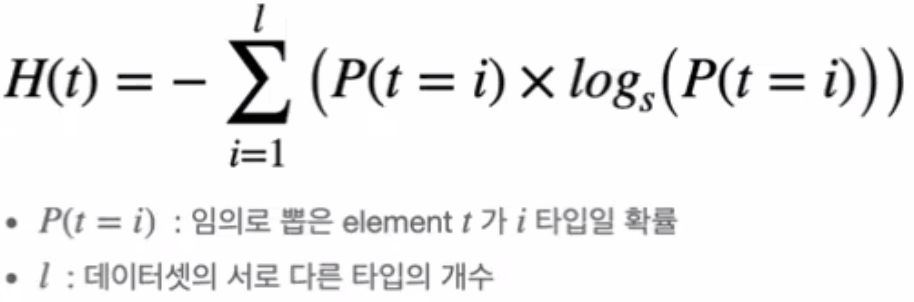

### Entropy
엔트로피는 정보량에서 기원?되었다. 정보량에 대한 것은 생략.<br>
정보량은 확률에 반비례<br>
엔트로피 : 정보량의 기대값(간단하게 평균이라 생각)<br>
엔트로피 : 발생 사건들의 정보량 모두 구해서 (가중) 평균<br>
<br>
드물개 발생하는 사건은 정보량이 크다<br>
degree of surprise (놀람의 정도)

In [19]:
import numpy as np
data = np.array([9, 3])

def calculator_entropy(data):
    n_data = np.sum(data)
    entropy = -(np.sum((data/n_data) * np.log2(data/n_data)))
    print(f'Entropy of {data} : {entropy}')
    return entropy

calculator_entory(data)
calculator_entory([6, 6])
calculator_entory([6, 3, 3])
calculator_entory([4, 4, 4])
calculator_entory([1, 1, 1 ,1 ,1 ,1 ,1 ,1 ,1, 1, 1])


p1 = 9/12
p2 = 3/12
H = -(p1*np.log2(p1) + p2*np.log2(p2))
print(f'P1, P2 : {p1}, {p2}')
print(f'H : {H}')

Entropy of [9 3] : 0.8112781244591328
Entropy of [6, 6] : 1.0
Entropy of [6, 3, 3] : 1.5
Entropy of [4, 4, 4] : 1.584962500721156
Entropy of [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] : 3.4594316186372978
Entropy of [1 1 1 1 1 1 1 1 1 1 1] : 3.4594316186372978
P1, P2 : 0.75, 0.25
H : 0.8112781244591328


#### Information Gain
Information Gain : 분기 이전과 분기 이후의 불순도의 차이<br>
IG 가 큰 feature 를 root node로 설정한다. <br>
불순도 구하는 방법 : entropy, gini index?<br>
<br>
Weighted entropy : 분기 이후의 분배되는 가중치<br>
Weight(가중치) : 노드의 데이터 개수 / 전체 데이터 개수<br>
Ig = (상위 노드의 entropy) - (W*(각노드의 entropy) + W*(각노드의 entropy) + ...)

#### Information Gain Ratio
IG로 분류하면 마지막에 각각 하나로 나누어진다.(한계점)<br>
IG의 한계점을 보완<br>
IGR = IG/IV

### Gini index
gini(t, D) = 1 - sum(P**2)
<br>
엔트로피 대신 Gini index 를 기준으로 IG, IGR 를 구하고 분류 모델을 만들면 된다. 

In [390]:
import numpy as np
tmp = np.array([7, 3])
tmp1 = np.array([6])
tmp2 = np.array([1, 3])

D = tmp.sum() # 10

def H(node):
    node = np.array(node)
    D_node = node.sum()
    P = node/D_node
    W = D_node/D
    return -(np.sum(W * P * np.log2(P)))

# print(H(tmp)) # 0.8813
IG = H(tmp) - (H(tmp1) + H(tmp2))
print(f'{H(tmp)} - ({H(tmp1)} + {H(tmp2)}) : {IG}')
IV = H([tmp1.sum(), tmp2.sum()])
IGR = IG/IV
print(f'IGR = IG/IB: {IGR} =  {IG}/{IV}')


0.8812908992306927 - (-0.0 + 0.3245112497836532) : 0.5567796494470395
IGR = IG/IB: 0.5734376729639401 =  0.5567796494470395/0.9709505944546686


In [415]:
import numpy as np
vegetation = np.array([3, 2, 2])
D = vegetation.sum() # 7
root_H = H(vegetation)

def H(node):
    node = np.array(node)
    D_node = node.sum()
    P = node/D_node
    W = D_node/D
    return -(np.sum(W * P * np.log2(P)))

def IG_def(*nodes):
    nodes_H = 0
    for node in nodes:
        nodes_H += H(node)
    return root_H - nodes_H   
    # return H([node.sum() for node in nodes]) - nodes_H

def IV_def(*nodes):
    IV_list = [node.sum() for node in nodes]
    return H(IV_list)

def IGR_def(*nodes):
    return IG_def(*nodes)/IV_def(*nodes)

stream_node1 = np.array([2, 1, 1])
stream_node2 = np.array([2, 1])
print(f'stream IG : {IG_def(stream_node1, stream_node2)}')
print(f'stream IV : {IV_def(stream_node1, stream_node2)}')
print(f'stream IGR: {IGR_def(stream_node1, stream_node2)}')

slope_node1 = np.array([3, 1, 1])
slope_node2 = np.array([1])
slope_node3 = np.array([1])
print(f'slope IG : {IG_def(slope_node1, slope_node2, slope_node3)}')
print(f'slope IV : {IV_def(slope_node1, slope_node2, slope_node3)}')
print(f'slope IGR: {IGR_def(slope_node1, slope_node2, slope_node3)}')

elevation_node1 = np.array([1])
elevation_node2 = np.array([1, 1])
elevation_node3 = np.array([2, 1])
elevation_node4 = np.array([1])
print(f'elevation IG : {IG_def(elevation_node1, elevation_node2, elevation_node3, elevation_node4)}')
print(f'elevation IV : {IV_def(elevation_node1, elevation_node2, elevation_node3, elevation_node4)}')
print(f'elevation IGR: {IGR_def(elevation_node1, elevation_node2, elevation_node3, elevation_node4)}')

stream IG : 0.30595849286804166
stream IV : 0.9852281360342515
stream IGR: 0.310545833678267
slope IG : 0.5774062828523452
slope IV : 1.1488348542809166
slope IGR: 0.5026016408718359
elevation IG : 0.8773870642966131
elevation IV : 1.8423709931771084
elevation IGR: 0.4762271375015451


In [52]:
import numpy as np

word = np.array([True, True, True, False, False, False]).reshape(-1, 1)
sender = np.array([False, True, True, True, False, False]).reshape(-1, 1)
images = np.array([True, False, False, True, False, False]).reshape(-1, 1)
# claxx = np.array(['spam', 'spam', 'spam', 'ham', 'ham', 'ham']).reshape(-1, 1)
claxx = np.array([True, True, True, False, False, False]).reshape(-1, 1)
claxx_type = np.unique(claxx)

dataset = np.concatenate([word, sender, images, claxx], axis=1) # (6, 4)

# element_of_word = np.unique(word)

# print(f'size of each : {(word[word==element_of_word[0]]).size}')
# print(f'size of each : {(word[word==element_of_word[1]]).size}')

# child_node = word==element_of_word # shape (6, 2)
# print(f'entropy of word : {word}')
# print(f'entropy of word : {word==element_of_word[:]}/{word.size}')

def calculator_entropy(data):
    n_data = data.size
    entropy = 0
    for element in claxx_type:
        P = data[data==element].size
        entropy += (P/n_data) * np.log2(P/n_data)
    entropy = -1 * entropy
    print(f'Entropy of {data.flatten()} : {entropy}')
    return entropy

# calculator_entory(word)
# calculator_entory(sender)
# calculator_entory(images)

def seperator_nodes(data):
    return [data[data==claxx_type[i]] for i in range(claxx_type.size)]


def calculator_IG(data):
    n_features = data[:,:-1].shape[1]

    for idx_feature in range(n_features):
        parents_entropy = calculator_entropy(data[:,idx_feature])
        parants_size = data[:,idx_feature].size
        node1, node2 = seperator_nodes(data[:,idx_feature])
        node1_ent = calculator_entropy(node1)
        node2_ent = calculator_entropy(node2)

        # print(data[data[:,idx_feature] == data[:,-1]])
        print(f'parents = {parents_entropy}, {parants_size}')
        print(f'child_node : {node1_ent}, {node2_ent}')

            


calculator_IG(dataset)


Entropy of [ True  True  True False False False] : 1.0
Entropy of [False False False] : nan
Entropy of [ True  True  True] : nan
parents = 1.0, 6
child_node : nan, nan
Entropy of [False  True  True  True False False] : 1.0
Entropy of [False False False] : nan
Entropy of [ True  True  True] : nan
parents = 1.0, 6
child_node : nan, nan
Entropy of [ True False False  True False False] : 0.9182958340544896
Entropy of [False False False False] : nan
Entropy of [ True  True] : nan
parents = 0.9182958340544896, 6
child_node : nan, nan


/var/folders/lq/nqfbjmpd3bl434m7j6ktxqn80000gn/T/ipykernel_80172/4150247329.py:26: RuntimeWarning: divide by zero encountered in log2
  entropy += (P/n_data) * np.log2(P/n_data)
/var/folders/lq/nqfbjmpd3bl434m7j6ktxqn80000gn/T/ipykernel_80172/4150247329.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  entropy += (P/n_data) * np.log2(P/n_data)


In [319]:
stream = np.array([4, 3])
vegetation = np.array([3, 2, 2])
root_ent = -(np.sum((vegetation/7) * np.log2(vegetation/7)))
D = vegetation.sum()

print(f'entropy stream : {root_ent}')

stream_node1 = np.array([2, 1, 1])
stream_node2 = np.array([2, 1])
D1 = stream_node1.sum()
D2 = stream_node2.sum()
stream_node1_ent = -(D1/D)*(np.sum((stream_node1/D1) * np.log2(stream_node1/D1)))
stream_node2_ent = -(D2/D)*(np.sum((stream_node2/D2) * np.log2(stream_node2/D2)))
print(f'entropy child1 of stream : {stream_node1_ent}')
print(f'entropy child2 of stream : {stream_node2_ent}')
print(f'IG of stream : {root_ent - (stream_node1_ent + stream_node2_ent)}')


slope = np.array([5, 1, 1])
print(f'entropy of slope : {root_ent}')
slope_node1 = np.array([3, 1, 1])
slope_node2 = np.array([1])
slope_node3 = np.array([1])
slope_node1_ent = -(5/7)*(np.sum((slope_node1/5) * np.log2(slope_node1/5)))
slope_node2_ent = -(1/7)*(np.sum((slope_node2/1) * np.log2(slope_node2/1)))
slope_node2_ent = -(1/7)*(np.sum((slope_node2/1) * np.log2(slope_node2/1)))
print(f'entropy child1 of slope : {slope_node1_ent}')
print(f'entropy child2 of slope : {slope_node2_ent}')
print(f'entropy child3 of slope : {slope_node2_ent}')
print(f'IG of slope : {root_ent - (slope_node1_ent + slope_node2_ent + slope_node2_ent)}')


elevation = np.array([1, 2, 3, 1])
print(f'entropy of elevation : {root_ent}')
elevation_node1 = np.array([1])
elevation_node2 = np.array([1, 1])
elevation_node3 = np.array([2, 1])
elevation_node4 = np.array([1])
elevation_node1_ent = -(1/7)*(np.sum((elevation_node1/1) * np.log2(elevation_node1/1)))
elevation_node2_ent = -(2/7)*(np.sum((elevation_node2/2) * np.log2(elevation_node2/2)))
elevation_node3_ent = -(3/7)*(np.sum((elevation_node3/3) * np.log2(elevation_node3/3)))
elevation_node4_ent = -(1/7)*(np.sum((elevation_node4/1) * np.log2(elevation_node4/1)))
print(f'entropy child1 of elevation : {elevation_node1_ent}')
print(f'entropy child2 of elevation : {elevation_node2_ent}')
print(f'entropy child3 of elevation : {elevation_node3_ent}')
print(f'entropy child4 of elevation : {elevation_node4_ent}')
print(fr'IG of elevation : {root_ent -(elevation_node1_ent + elevation_node2_ent + elevation_node3_ent + elevation_node4_ent)}')
# 1. root entropy 구하기 (=depth 0)
# 2. Children nodes 분리. 각가의 노드의 entropy 구하고 IG 저장
# 3. IG 중 제일 큰 Children nodes , entropy 리턴 (=depth 1)
# 4. Children nodes 의 각각의 노드를 parents node로 정의하고 2번 작업 반복
# 5. 3번 작업 반복. (=depth 2)



entory stream : 1.5566567074628228
entory child1 of stream : 0.8571428571428571
entory child2 of stream : 0.39355535745192405
IG of stream : 0.30595849286804166
entory of slope : 1.5566567074628228
entory child1 of slope : 0.9792504246104776
entory child2 of slope : -0.0
entory child3 of slope : -0.0
IG of slope : 0.5774062828523452
entory of elevation : 1.5566567074628228
entory child1 of elevation : -0.0
entory child2 of elevation : 0.2857142857142857
entory child3 of elevation : 0.39355535745192405
entory child4 of elevation : -0.0
IG of elevation : 0.8773870642966131


In [15]:
import numpy as np
stream = np.array([False, True, True, False, False, True, True]).reshape(-1, 1) # (7, 1)
slope = np.array(['steep', 'moderate', 'steep', 'steep', 'flat', 'steep', 'steep']).reshape(-1, 1)
elevation = np.array(['high', 'low', 'medium', 'medium', 'high', 'highest', 'high']).reshape(-1, 1)
vegetation = np.array(['chapparal', 'riparian', 'riparian', 'chapparal', 'conifer', 'conifer', 'chapparal']).reshape(-1, 1)

dataset = np.concatenate([stream, slope, elevation, vegetation], axis=1) # (7, 4)
D = dataset.shape[0]
n_features = dataset.shape[1] -1

def H(node):
    node = np.array(node)
    D_node = node.sum()
    P = node/D_node
    W = D_node/D
    entropy = -(np.sum(W * P * np.log2(P)))
    return entropy

# gini(t, D) = 1 - sum(P**2)

def G(node):
    D_node = node.sum()
    P = node/D_node
    W = D_node/D
    gini = 1 - np.sum(W * P**2)
    return gini

def IG_def(*nodes):
    nodes_H = 0
    for node in nodes:
        nodes_H += H(node)
    return root_H - nodes_H   
    # return H([node.sum() for node in nodes]) - nodes_H

def IV_def(*nodes):
    IV_list = [node.sum() for node in nodes]
    return H(IV_list)

def IGR_def(*nodes):
    return IG_def(*nodes)/IV_def(*nodes)


root_levels, root_instances = np.unique(dataset[:, -1], return_counts=True)
root_H = H(root_instances)
tmp = np.array([3, 2, 2, 1])
print(H(tmp))
print(G(tmp))

for idx_feature in range(n_features):
    parents_node = dataset[:,idx_feature]
    levels, instances = np.unique(parents_node, return_counts=True)
    parents_IV = H(instances)

    Rem = 0
    for level in levels:
        child_set = dataset[dataset[:, idx_feature]==level][:,-1]
        child_levels, child_instances = np.unique(child_set, return_counts=True)
        # print(f'{child_set.flatten()} {child_levels} {child_instances}')
        print(H(child_instances))
        Rem += H(child_instances)

    children_IG = root_H - Rem
    children_IGR = children_IG/parents_IV
    print(f'Feature {idx_feature} IG : {children_IG}')
    print(f'Feature {idx_feature} IGR : {children_IGR}')



# idx_feature = 2
# parents_node = dataset[:,2]
# levels, instances = np.unique(parents_node, return_counts=True)
# # print(levels) # ['high' 'highest' 'low' 'medium']
# parents_IV = H(instances)

# Rem = 0
# for level in levels:
#     child_set = dataset[dataset[:, idx_feature]==level][:,-1]
#     child_levels, child_instances = np.unique(child_set, return_counts=True)
#     print(f'{child_set.flatten()} {child_levels} {child_instances}')
#     print(H(child_instances))
#     Rem += H(child_instances)

# children_IG = root_H - Rem
# children_IGR = children_IG/parents_IV
# print(f'sub IG : {children_IG}')
# print(f'sub IGR : {children_IGR}')





2.1778732139766475
0.71875
0.3935553574519241
0.8571428571428571
Feature 0 IG : 0.30595849286804166
Feature 0 IGR : 0.310545833678267
-0.0
-0.0
0.9792504246104776
Feature 1 IG : 0.5774062828523452
Feature 1 IGR : 0.5026016408718359
0.3935553574519241
-0.0
-0.0
0.2857142857142857
Feature 2 IG : 0.8773870642966131
Feature 2 IGR : 0.4762271375015451
